**Simulaciones - Sistemas de control continuo**

Estudiantes: Julian Sanchez Ceballos, Yonathan Lopez Mejia

In [11]:
!pip install control

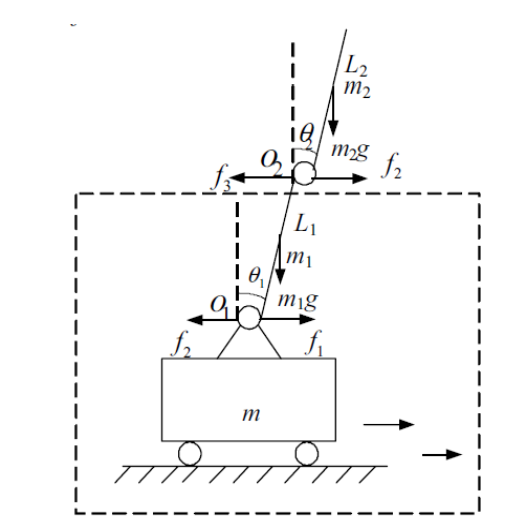

Al aplicar el formalismo lagrangiano y linealizar el sistema se obtiene el siguiente espacio de estados para la planta en lazo abierto


In [12]:
from control.matlab import *
import numpy as np
import control
import matplotlib.pyplot as plt
import numpy as np

In [13]:
A = [
    [0, 1.0000, 0, 0, 0, 0],
    [0, 0, -4.7581, 0, -0.1699, 0],
    [0, 0, 0, 1.0000, 0, 0],
    [0, 0, 35.5440, 0, -12.7449, 0],
    [0, 0, 0, 0, 0, 1.0000],
    [0, 0, -25.4897, 0, 27.1182, 0]
]

B = [[0], [0.6532], [0], [-1.0105], [0], [-0.0722]]

C = [
    [1, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 1, 0]
]

sysLTI = ss(A,B,C,0)

Se puede observar el espacio de las raíces del sistema. Como control.root_locus espera un sistema SISO se graficará solamente para X, es claro que los polos para $\theta_{1}$ y $\theta_{2}$ son iguales. Con lo cual la inestabilidad del sistema es más clara



In [14]:
sysLTIx = ss(A,B,[1,0,0,0,0,0],0)

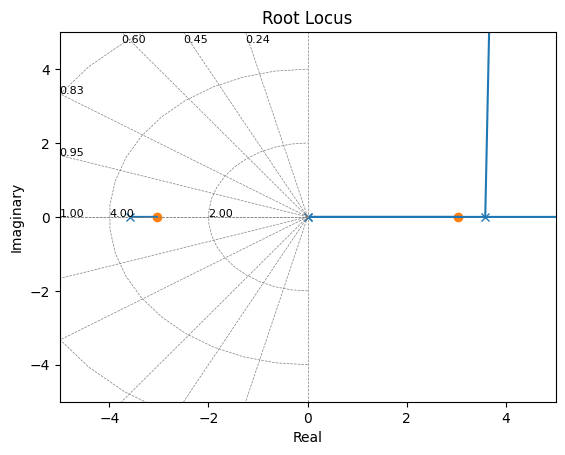

In [15]:
[k,gain] = control.root_locus(sysLTIx, xlim=(-5,5),ylim = (-5,5),grid = True)

La salida de las posiciones para el carrito y los péndulos es:

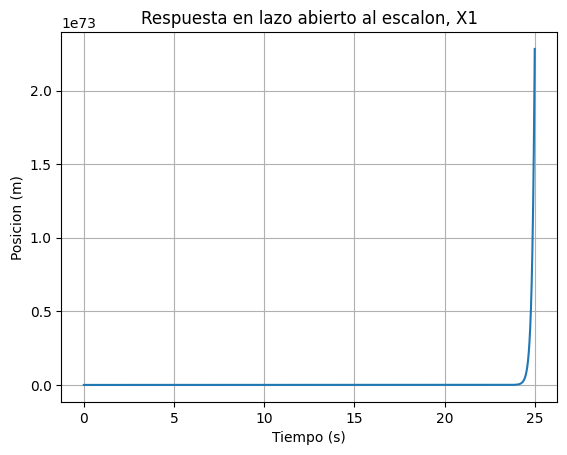

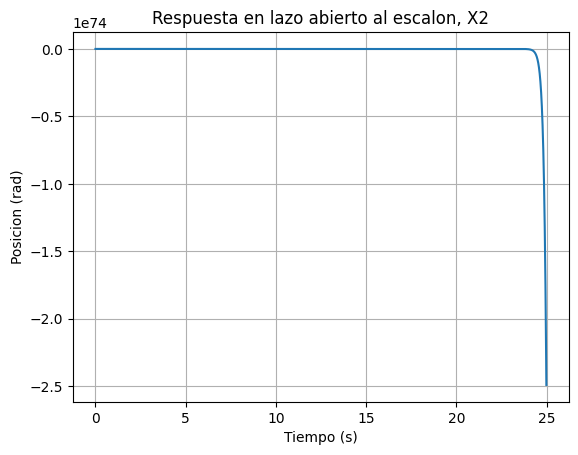

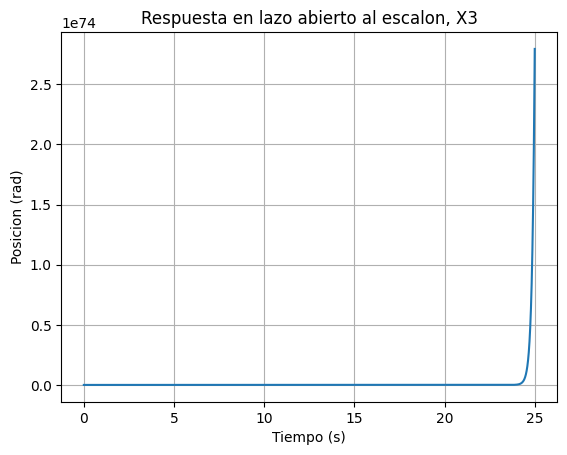

In [16]:
t = np.arange(0,25,0.01)
y,t_cont = step(sysLTI, t)

plt.plot(t_cont,y[:,0])
plt.title('Respuesta en lazo abierto al escalon, X1')
plt.xlabel('Tiempo (s)')
plt.ylabel('Posicion (m)')
plt.grid()
plt.show()
plt.plot(t_cont,y[:,1])
plt.title('Respuesta en lazo abierto al escalon, X2')
plt.xlabel('Tiempo (s)')
plt.ylabel('Posicion (rad)')
plt.grid()
plt.show()
plt.plot(t_cont,y[:,2])
plt.title('Respuesta en lazo abierto al escalon, X3')
plt.xlabel('Tiempo (s)')
plt.ylabel('Posicion (rad)')
plt.grid()
plt.show()

El carrito se moverá hasta el infinito y ambos brazos girarán indefinidamente. Ahora, se simulará el **control por realimentacion de estados**. En ML se diseñó para un tiempo de establecimiento de 5s y un sobreimpulso de 0.01

In [17]:
Mp = 0.01
Ts = 5
e = np.sqrt((np.log(Mp)**2) / ((np.log(Mp)**2) + np.pi**2))
wn = 4.6 / (Ts * e)
polo_des_2do = np.roots([1, 2*e*wn, wn**2])
polos_des = [polo_des_2do[0], polo_des_2do[1], -8, -9, -10, -11]
K = acker(A, B, polos_des)

El sistema en lazo cerrado sera entonces:

In [18]:
sysLTI_closedLoop = ss(A-B@K,B,C,0);

Y por facilidad solamente se graficarán las posiciones del carrito y los dos pendulos

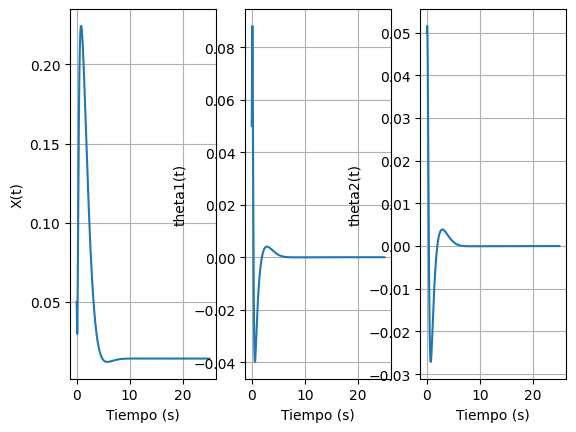

In [19]:
x0 = [0.05,0,0.05,0,0.05,0]
yout, T, xout = lsim(sysLTI_closedLoop,0.5,t,x0)

fig, axs = plt.subplots(1, 3)

axs[0].plot(T, yout[:,0])
axs[0].set_xlabel('Tiempo (s)')
axs[0].set_ylabel('X(t)')
axs[0].grid()

axs[1].plot(T, yout[:,1])
axs[1].set_xlabel('Tiempo (s)')
axs[1].set_ylabel('theta1(t)')
axs[1].grid()

axs[2].plot(T, yout[:,2])
axs[2].set_xlabel('Tiempo (s)')
axs[2].set_ylabel('theta2(t)')
axs[2].grid()

plt.show()

Dando como resultado un sistema controlado para las posiciones del carrito y los dos brazos

Ahora también se puede hacer una discretización del sistema y proceder a simularlo. De ML se sabe que el tiempo de muestreo viene dado por $\frac{2π}{80*7.0598}$ donde 7.0598 es la magnitud del polo más a la izquierda

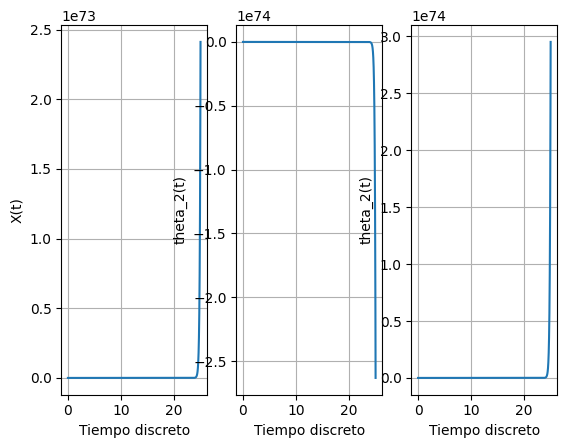

In [20]:
tm = (2*np.pi)/(80*7.0598 )
t_dis = np.arange(0,25,tm)
G_dis = c2d(sysLTI, tm)

yDis,T = step(G_dis,t_dis)

fig, axs = plt.subplots(1, 3)
axs[0].plot(T,yDis[:,0],label = 'X discreto')
axs[0].set_xlabel("Tiempo discreto")
axs[0].set_ylabel("X(t)")
axs[0].grid()

axs[1].plot(T,yDis[:,1],label = 'theta1 discreto')
axs[1].set_xlabel("Tiempo discreto")
axs[1].set_ylabel("theta_2(t)")
axs[1].grid()

axs[2].plot(T,yDis[:,2],label = 'theta2 discreto')
axs[2].set_xlabel("Tiempo discreto")
axs[2].set_ylabel("theta_2(t)")
axs[2].grid()
plt.show()